# Рыкова А.В. 17-АС


## Вариант 17


#### Выполнение работы:

Задание:

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


Предварительная работа:

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

SEPAL_LENGTH = 'SepalLength(cm)'
SEPAL_WIDTH = 'SepalWidth(cm)'
PETAL_LENGTH = 'PetalLength(cm)'
PETAL_WIDTH = 'PetalWidth(cm)'
SPECIES = 'Species'

x = pd.read_csv('iris.data.txt')
data_pandas = pd.DataFrame(x)
data_pandas.head()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
data_pandas.shape

(150, 5)

In [109]:
data_pandas.count()

SepalLength(cm)    150
SepalWidth(cm)     150
PetalLength(cm)    150
PetalWidth(cm)     150
Species            150
dtype: int64

In [110]:
data_pandas.groupby([SPECIES]).mean()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

#### Переменная     |       Описание                         |     Параметры(Ключи)

Sepal Length (cm)   |   Длина чашелистника в см |  Любой числовой

Sepal Width (cm)    |  Ширина чашелистника в см |  Любой числовой

Petal Length (cm)   |  Длина лепестка в см      |  Любой числовой

Petal Width (cm)    |  Ширина лепестка в см     |  Любой числовой

Species             |  Вид                      |  1. Iris Setosa 2. Iris Versicolour 3. Iris Virginica

##### Задача: по данным признакам предсказать класс растения.
Лишних признаков нет

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [111]:
data_pandas = data_pandas.drop_duplicates()
data_pandas.shape

(147, 5)

### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

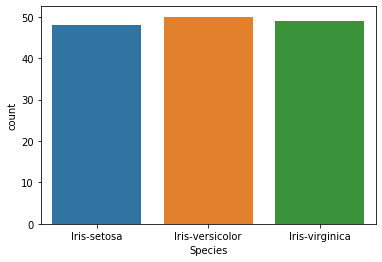

In [112]:
sns.countplot(data=data_pandas, x=SPECIES)
plt.show()

Объем данных по каждому классу отличается незначительно. Будем считать, что классы сбалансированны.

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

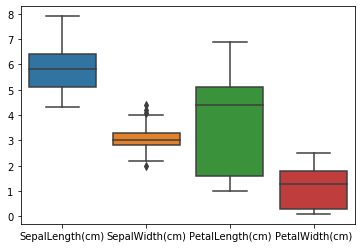

In [113]:
numerical_columns = [SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH]
sns.boxplot(data=data_pandas[numerical_columns])
plt.show()

#### Выбираем способ масштабирования - нормализация

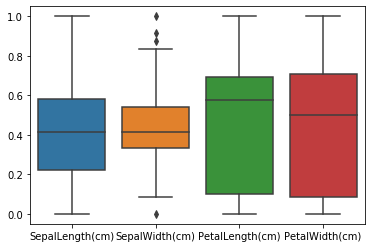

In [114]:
scaler = preprocessing.MinMaxScaler()
data_pandas[numerical_columns] = scaler.fit_transform(data_pandas[numerical_columns].values.astype(float))
sns.boxplot(data=data_pandas[numerical_columns])
plt.show()

### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [115]:
lb_make = LabelEncoder() 
data_pandas[SPECIES] = lb_make.fit_transform(data_pandas[SPECIES])
data_pandas.head()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


LabelEncoder - используeтся для преобразования категориальных или текстовых данных в числа, которые наши предсказательные модели понимают лучше. 

### 6.	Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

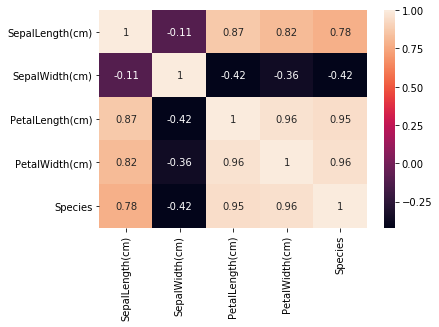

In [116]:
df_corr = data_pandas.corr()
sns.heatmap(df_corr, annot = True)
plt.show()

### 7.	Заполните пропущенные значения в данных

Пропущеных значений нет

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию

In [117]:
X = np.array(data_pandas.drop(SPECIES, axis=1))
y = np.array(data_pandas[SPECIES]) 
y = label_binarize(y, classes=[x for x in range(3)])
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size = 0.5, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(73, 4)
(74, 4)


In [118]:
rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': np.linspace(0.4, 1, 20)[1:],
         'leaf_size': np.linspace(1, 2, 20)[1:]}
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)
y_score = rnc_grid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_score, y_test)))
print('Best score: {}'.format(rnc_grid.best_score_))

Accuracy: 0.9054054054054054
Best score: 0.9041095890410958


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


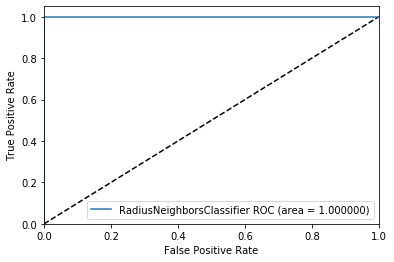

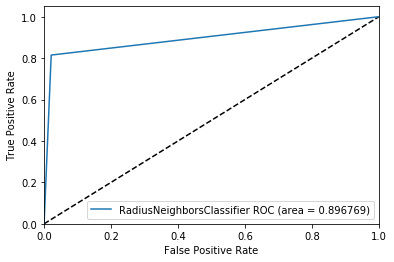

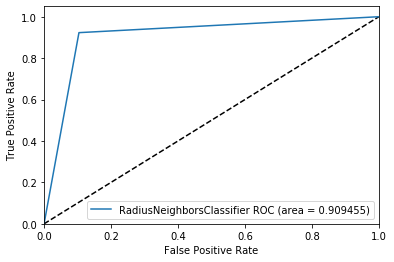

In [119]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc[i]))  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4, fontsize='medium')
    plt.show()

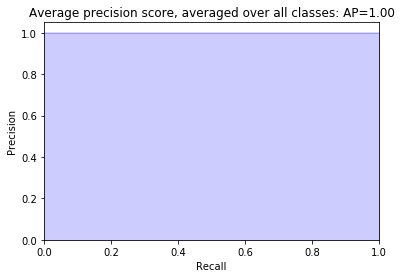

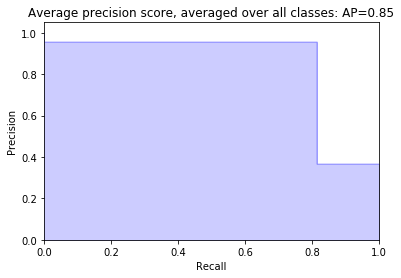

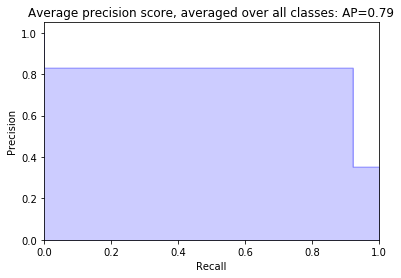

In [120]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, averaged over all classes: AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

In [121]:
clf_perceptron = OneVsRestClassifier(linear_model.Perceptron())
params = {
      'estimator__alpha': np.linspace(0, 1, 50)[1:],
      'estimator__max_iter': [(x+1)*100 for x in range(10)],
      }
param_search = GridSearchCV(estimator=clf_perceptron, param_grid=params)
param_search.fit(X_train, y_train)
y_score = param_search.best_estimator_.fit(X_train, y_train).decision_function(X_test)
print('Accuracy: {}'.format(accuracy_score(param_search.best_estimator_.predict(X_test), y_test)))
print('Best score: {}'.format(param_search.best_score_))

Accuracy: 0.6486486486486487
Best score: 0.589041095890411


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


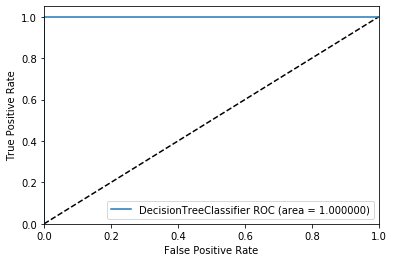

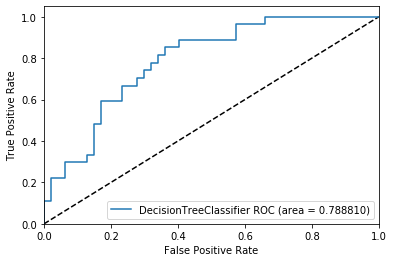

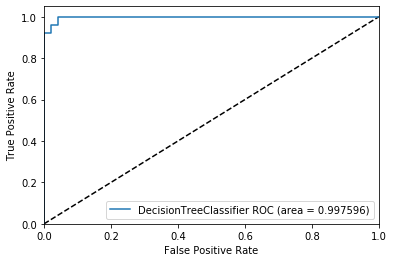

In [122]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc[i]))  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4, fontsize='medium')
    plt.show()

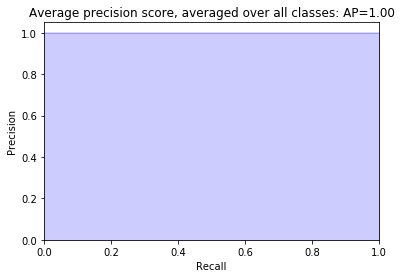

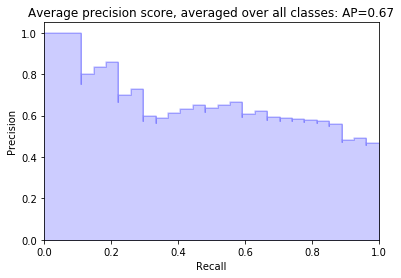

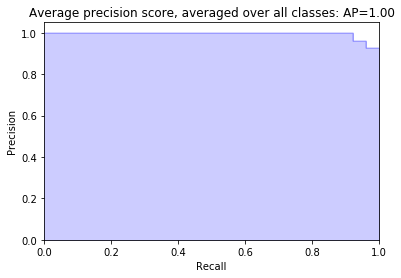

In [123]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, averaged over all classes: AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

### 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы

Оба классификатора (персептрон и k ближайших соседей) имеют примерно одинаковые показатели качества относительно PR и ROC кривых. В целом, данные классификаторы правильно решают задачу предсказания класса с вероятностью 0.909~0.997, что очень точно.